# BUSSINESS UNDERSTANDING

dataset : https://www.kaggle.com/datasets/psycon/daily-coffee-price

Model ini dibuat untuk mendapatkan prediksi harga kopi dalam USD yang dapatkan dengan inputan:

Harga awal saat perdadangan dimulai

Harga tertinggi kopi selama satu periode

Harga terendah kopi selama satu periode

Volume = Jumlah kopi yang diperdagangkan


Kopi adalah minuman seduh yang dibuat dari biji kopi panggang, biji buah beri dari tumbuhan berbunga tertentu dalam genus Coffea. Dari buah kopi, bijinya dipisahkan untuk menghasilkan produk mentah yang stabil: kopi hijau yang tidak disangrai. Benih tersebut kemudian dipanggang, sebuah proses yang mengubahnya menjadi produk yang dapat dikonsumsi: kopi panggang, yang ditumbuk menjadi partikel halus yang biasanya direndam dalam air panas sebelum disaring, menghasilkan secangkir kopi

In [23]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('coffee.csv')

# DATA UNDERSTANDING

Date = Tanggal

Open = Harga awal saat perdadangan dimulai

High = Harga tertinggi kopi selama satu periode

Low = Harga terendah kopi selama satu periode

Close = Harga penutupan umumnya mengacu pada harga terakhir kopi diperdagangkan selama sesi perdagangan reguler.

Volume = Jumlah kopi yang diperdagangkan

In [25]:
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.00,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.00,115.00,118.60,6165,USD
3,2000-01-06,119.00,121.40,116.50,116.85,5094,USD
4,2000-01-07,117.25,117.75,113.80,114.15,6855,USD


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5746 non-null   object 
 1   Open      5746 non-null   float64
 2   High      5746 non-null   float64
 3   Low       5746 non-null   float64
 4   Close     5746 non-null   float64
 5   Volume    5746 non-null   int64  
 6   Currency  5746 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 314.4+ KB


<Axes: >

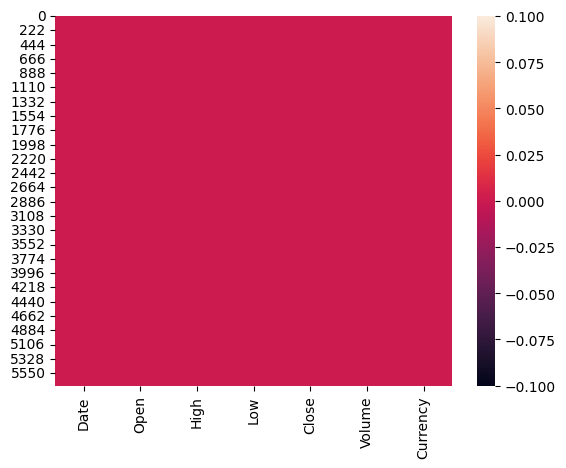

In [27]:
sns.heatmap(df.isnull())

In [28]:
df.describe()

,Open,High,Low,Close,Volume
count,5746.000000,5746.000000,5746.000000,5746.000000,5746.000000
mean,127.267635,128.847034,125.784669,127.215567,8807.178907
std,50.569425,51.164948,49.851487,50.506519,9612.789034
min,41.500000,42.000000,41.500000,41.500000,0.000000
25%,98.800000,100.112500,97.862500,98.650000,61.000000
50%,120.400000,121.600000,118.950000,120.250000,7008.000000
75%,144.800000,146.000000,143.000000,144.337500,14497.750000
max,305.300000,306.250000,304.000000,304.900000,62045.000000


In [29]:
df.shape

(5746, 7)

In [30]:
df.duplicated().sum()

0

# DATA PREPARATION

<ipython-input-31-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

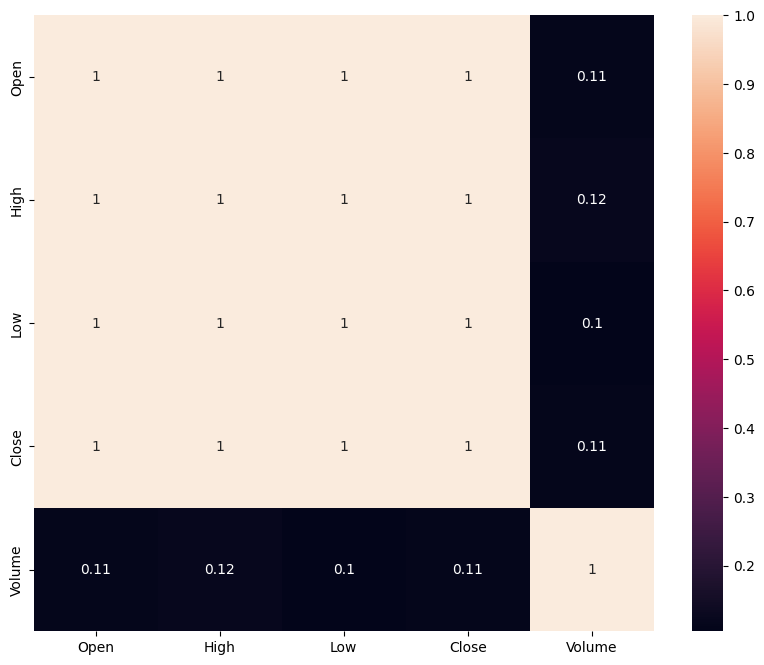

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Open'>

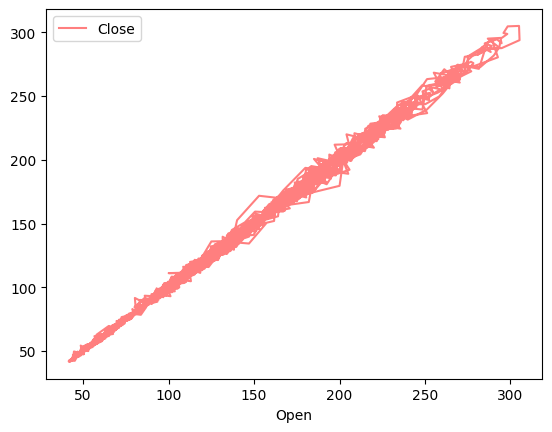

In [32]:
df.plot(x="Open", y="Close", color="red", alpha=0.5)

<Axes: xlabel='High', ylabel='Close'>

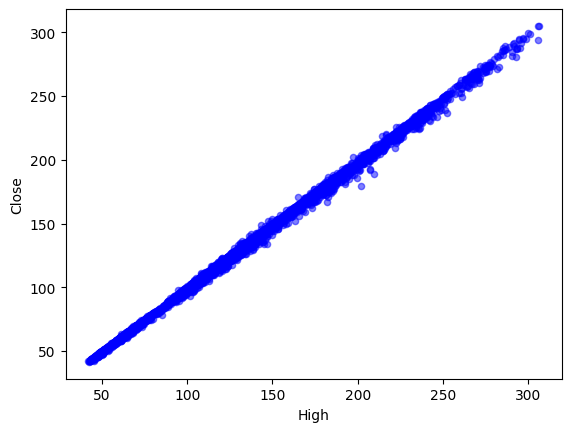

In [33]:
df.plot(x="High", y="Close", kind="scatter", color="blue", alpha=0.5)

<Axes: xlabel='Low'>

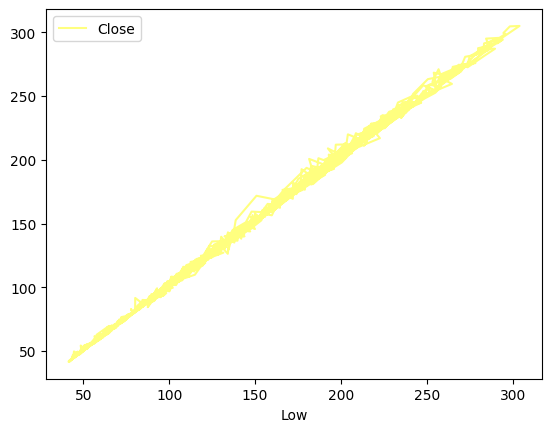

In [34]:
df.plot(x="Low", y="Close", color="Yellow", alpha=0.5)

<ipython-input-35-ccf1cbabff17>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Volume'])


<Axes: xlabel='Volume', ylabel='Density'>

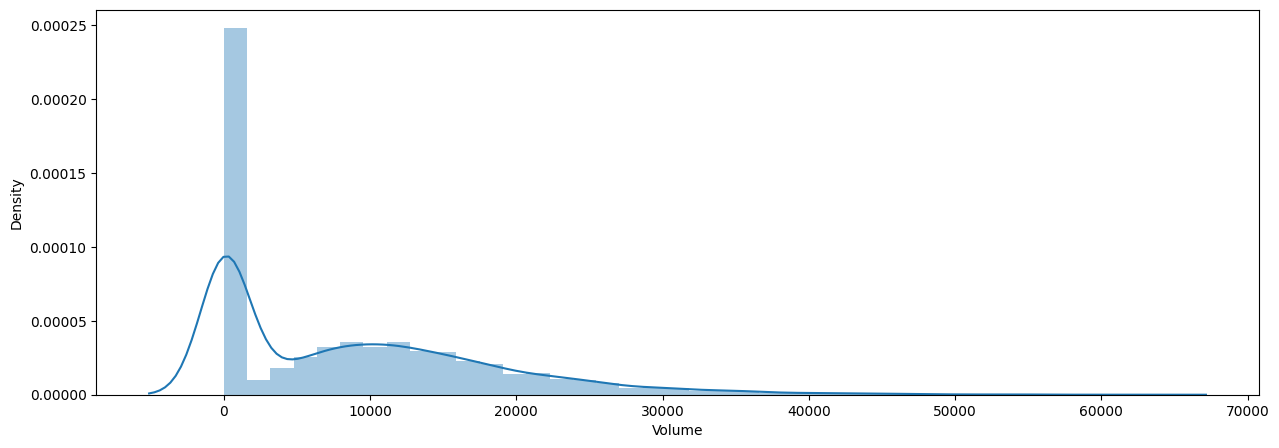

In [35]:
plt.figure(figsize=(15,5))
sns.distplot(df['Volume'])

In [36]:
df = df.drop(['Currency'], axis=1)
df.head()

,Date,Open,High,Low,Close,Volume
0,2000-01-03,122.25,124.00,116.10,116.50,6640
1,2000-01-04,116.25,120.50,115.75,116.25,5492
2,2000-01-05,115.00,121.00,115.00,118.60,6165
3,2000-01-06,119.00,121.40,116.50,116.85,5094
4,2000-01-07,117.25,117.75,113.80,114.15,6855


# seleksi fitur

In [37]:
features = ['Open', 'High', 'Low','Volume']
x = df[features]
y = df['Close']
x.shape, y.shape

((5746, 4), (5746,))

# split data training dan data testing

In [38]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(1437,)

# membuat model regresi linier

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [40]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.9994025258659542


# membuat inputan model regresi linier

In [41]:
# Open  ,  High ,    Low    , Volume ,  Close
# 122.25 , 124.00 , 116.10 ,  6640 , 116.50
input_data = np.array([[122.25,124.00,116.10,6640]])

prediction = lr.predict(input_data)
print('Estimasi harga BTC :', prediction)

Estimasi harga BTC : [118.41637661]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [42]:
import pickle

filename = 'estimasi_coffee.sav'
pickle.dump(lr,open(filename,'wb'))